In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import cv2

# Past values local global:
def extract_patches(image_path, patch_size_local=512, patch_size_global=1024, stride=256):
    # Load the image
    img = cv2.imread(image_path)
    
    # Extract the global patch for each local patch
    half_local_patch = patch_size_local // 2
    half_global_patch = patch_size_global // 2
    local_patches = []
    global_patches = []
    i=0
    for y in range(half_global_patch, img.shape[0]-half_global_patch, stride):
        # i=0
        for x in range(half_global_patch, img.shape[1]-half_global_patch, stride):
            # print(i)
            # i+=1
            # Extract local patch
            local_patch = img[y-half_local_patch:y+half_local_patch, x-half_local_patch:x+half_local_patch]
            local_patches.append(local_patch)
            
            # Extract global patch
            global_patch = img[y-half_global_patch:y+half_global_patch, x-half_global_patch:x+half_global_patch]
            global_patches.append(global_patch)
            
    return local_patches, global_patches


In [ ]:
local_patches, global_patches = extract_patches(image_path)

In [3]:
import os
import csv
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image

# Define the paths to the image files
dest_path = '/gdrive/My Drive/Normalized_Images/'
categories = ['Benign', 'Normal', 'Invasive', 'InSitu']

# Create an empty dictionary to store the extracted features
# Local_images_dict = {}
# Global_images_dict = {}

Local_images_array = []
Global_images_array = []
# Loop through each category and extract the features for each image
for category in categories:
    src_path = dest_path + category + '/'
    files = os.listdir(src_path)
    i = 0
    for file in files:
        if file.endswith('.tif'):
            img_path = src_path + file
            local_patches, global_patches = extract_patches(img_path)
            for j in range(0, len(local_patches)):
              # Local_images_dict[file + str(j)] = local_patches[j]
              # Global_images_dict[file + str(j)] = global_patches[j]
              # Local_images_array = np.append(Local_images_array, local_patches[j])
              # Global_images_array = np.append(Global_images_array, global_patches[j])
              Local_images_array.append(local_patches[j])
              Global_images_array.append(global_patches[j])


            print(i)
            i+=1

# Write the features to a CSV file
# with open('/gdrive/My Drive/image_features.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['filename'] + ['feature{}'.format(i) for i in range(7*7*512)])
#     for file, features in features_dict.items():
#         writer.writerow([file] + list(features))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

In [4]:
np.save('/gdrive/My Drive/global_images_1024.npy', Global_images_array)
np.save('/gdrive/My Drive/local_images_512.npy', Local_images_array)

In [6]:
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.layers import Dense, Flatten
from keras.models import Model
# Load VGG16 model
# resNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(512, 512, 3))
resNet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(512, 512, 3), pooling="avg")
# vgg_model = VGG16(weights='imagenet', include_top=False)
x = Flatten()(resNet50_model.output)

features = Dense(1000, activation='relu')(x)
model = Model(inputs=resNet50_model.input, outputs=features)



# Define a function to extract features from an image
# def extract_features(img_path):
#     # Load the image
#     img = load_img(img_path, target_size=(1536, 2048))
#     # Convert the image to an array
#     x = img_to_array(img)
#     # Expand the dimensions of the array to match the input shape of the model
#     x = np.expand_dims(x, axis=0)
#     # Preprocess the input
#     x = preprocess_input(x)
#     # Extract features using the VGG16 model
#     features = vgg_model.predict(x)
#     # features = model.predict(x)
#     # Flatten the features into a 1D array
#     features = features.flatten()
#     return features


def extract_features(img_array):
    # Expand the dimensions of the array to match the input shape of the model
    x = np.expand_dims(img_array, axis=0)
    # Preprocess the input
    x = preprocess_input(x)
    # Extract features using the VGG16 model
    # features = vgg_model.predict(x)
    # Flatten the features into a 1D array
    # features = features.flatten()
    features = model.predict(x)
    return features

94765736/94765736 [==============================] - 5s 0us/step


In [7]:
features1 = model.predict(np.array(Local_images_array) , batch_size = 8)

400/400 [==============================] - 53s 106ms/step


In [8]:
np.save('/gdrive/My Drive/local_features_resnet_avg_pooling.npy', features1)

In [17]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [16]:
!nvidia-smi --query-gpu=memory.total,memory.used,memory.free --format=csv

memory.total [MiB], memory.used [MiB], memory.free [MiB]
15360 MiB, 14489 MiB, 612 MiB


# Global

In [9]:
import cv2

for i in range(len(Global_images_array)):
    # Load the image
    img = Global_images_array[i]
    
    # Resize the image to 512x512 using OpenCV
    resized_img = cv2.resize(img, (512, 512))
    
    # Replace the original image in the array with the resized image
    Global_images_array[i] = resized_img

In [10]:
len(Global_images_array)

3200

In [11]:
features2 = model.predict(np.array(Global_images_array) , batch_size = 8)

400/400 [==============================] - 46s 115ms/step


In [12]:
np.save('/gdrive/My Drive/global_features_resnet_avg_pooling.npy', features2)

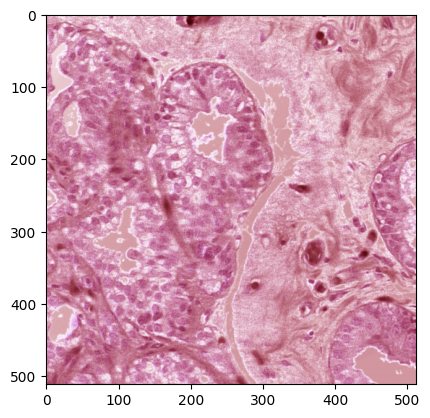

In [18]:
import matplotlib.pyplot as plt

plt.imshow(Global_images_array[81])

#check inception